In [1]:
import pickle
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
import seaborn as sns
from statistics import stdev
from math import log
import numpy as np
from scipy import stats
from statistics import mean
%matplotlib inline


In [2]:
price_100_stan = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Initial\\Standard\\stan_total_price.p","rb"))
price_100_brute = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Policy\\Explicit\\brute_total_price_10.p", "rb"))
price_100_net = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Policy\\Network\\total_price_10.p", "rb"))

In [3]:
from collections import defaultdict

def make_distro(price_100):
    all_stds =[]
    total_log = defaultdict(list)
    for run, output in price_100.items(): 
        for step, prices in output.items():
            log_pr = [log(p) for p in prices]
            if len(log_pr) <2: 
                pass       
            else:     
                out = stdev(log_pr)
                total_log[run].append(out) 
                all_stds.append(out)
    return all_stds




In [4]:
price_stan = make_distro(price_100_stan)
price_brute = make_distro(price_100_brute)
price_net = make_distro(price_100_net)

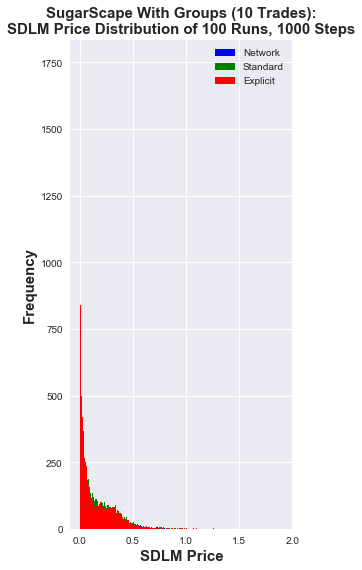

In [5]:
fig, ax = plt.subplots(figsize = (4,9))


ax.hist(price_net, 500, label = "Network", color='blue')
ax.hist(price_stan, 500, label = "Standard", color ='green')
ax.hist(price_brute, 500, label = "Explicit", color = 'red')
plt.title("SugarScape With Groups (10 Trades):\nSDLM Price Distribution of 100 Runs, 1000 Steps", fontsize = 15, fontweight = "bold")
plt.xlabel("SDLM Price", fontsize = 15, fontweight = "bold")
plt.ylabel("Frequency", fontsize = 15, fontweight = "bold")
#plt.xlim(.75,2)
#plt.ylim(0,1000)
plt.legend()

In [86]:
## Calculate price

In [111]:
ind_stan = price_100_stan["Run17"]
ind_net = price_100_net["Run17"]
ind_brute = price_100_brute["Run17"]

In [112]:
def ind_price(ind_e):
    x = []
    y =[]
    for st, pr in ind_e.items(): 
        #if step <=400: 
            x.append(st)
            y.append(gmean(pr))
    return (x,y)
        


In [113]:
x_s, y_s = ind_price(ind_stan)
x_b, y_b = ind_price(ind_brute)
x_n, y_n = ind_price(ind_net)

(0, 3)

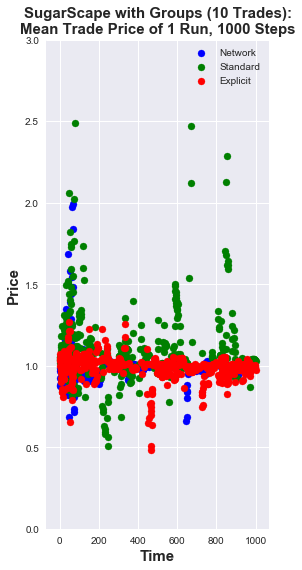

In [114]:
fig, ax = plt.subplots(figsize = (4,9))
ax.scatter(x_n, y_n, label = "Network", color='blue')
ax.scatter(x_s,y_s, label = "Standard", color ='green')
ax.scatter(x_b,y_b, label = "Explicit", color = 'red')
plt.title("SugarScape with Groups (10 Trades):\nMean Trade Price of 1 Run, 1000 Steps", fontsize = 15, fontweight = "bold")
plt.xlabel("Time", fontsize = 15, fontweight = "bold")
plt.ylabel("Price", fontsize = 15, fontweight = "bold")
plt.legend()
plt.ylim(0,3)

In [115]:
def ind_volume(ind_e):
    x_vol = []
    y_vol = []
    total = 0
    for s, p in ind_e.items(): 
        #if step <=400:

            x_vol.append(s)
            y_vol.append(len(p))
            total += len(p)
    return (x_vol, y_vol, total)

In [116]:
x_vol_stan, y_vol_stan, stan_vol = ind_volume(ind_stan)
x_vol_brute, y_vol_brute, brute_vol = ind_volume(ind_brute)
x_vol_net, y_vol_net, net_vol = ind_volume(ind_net)

In [117]:
len(y_vol_stan)

357

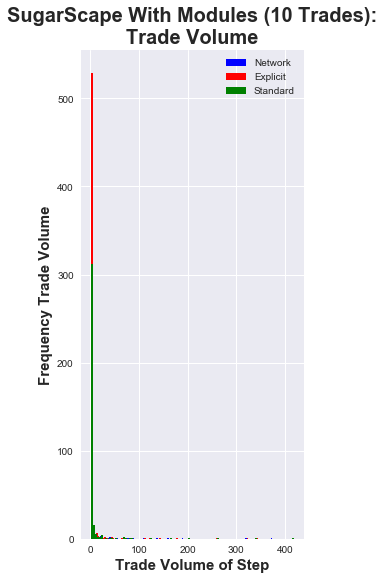

In [118]:
fig2, ax2 = plt.subplots(figsize = (4,9))
ax2.hist(y_vol_net, 100, label = "Network", color='blue')
ax2.hist(y_vol_brute, 100, label = "Explicit", color = 'red')
ax2.hist(y_vol_stan, 100, label = "Standard", color ='green')
plt.title("SugarScape With Modules (10 Trades):\nTrade Volume", fontsize = 20, fontweight = "bold")
plt.xlabel("Trade Volume of Step", fontsize = 15, fontweight = "bold")
plt.ylabel("Frequency Trade Volume", fontsize = 15, fontweight = "bold")
plt.legend()

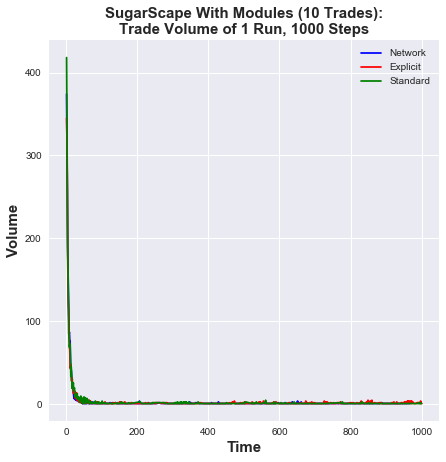

In [119]:
fig2, ax2 = plt.subplots(figsize = (7,7))
ax2.plot(x_vol_net, y_vol_net, label = "Network", color='blue')
ax2.plot(x_vol_brute, y_vol_brute, label = "Explicit", color = 'red')
ax2.plot(x_vol_stan, y_vol_stan, label = "Standard", color ='green')
plt.title("SugarScape With Modules (10 Trades):\nTrade Volume of 1 Run, 1000 Steps", fontsize = 15, fontweight = "bold")
plt.xlabel("Time", fontsize = 15, fontweight = "bold")
plt.ylabel("Volume", fontsize = 15, fontweight = "bold")
#ax2.text(600,300, "Total Trade Volume: \n "+str(total), fontsize = 15, fontweight = 'bold')
#plt.ylim(0,400)
plt.legend()

In [120]:

def sdlm(ind_e):
    x_dev =[]
    y_dev = []
    x_all = []
    y_all = []
    log_prices = {}
    for step, prices in ind_e.items(): 
        log_prices[step] = [abs(log(p)) for p in prices]
    for step, log_p in log_prices.items(): 
        #if step <= 400: 


            if len(log_p) <2: 
                pass       
            else: 
                for each in log_p: 
                    x_all.append(step)
                    y_all.append(each)

                x_dev.append(step)
                y_dev.append(stdev(log_p))
    return (x_dev, y_dev, x_all, y_all)
    


In [121]:
x_dev_stan, y_dev_stan, x_all_stan, y_all_stan = sdlm(ind_stan)
x_dev_brute, y_dev_brute, x_all_brute, y_all_brute = sdlm(ind_brute)
x_dev_net, y_dev_net, x_all_net, y_all_net = sdlm(ind_net)


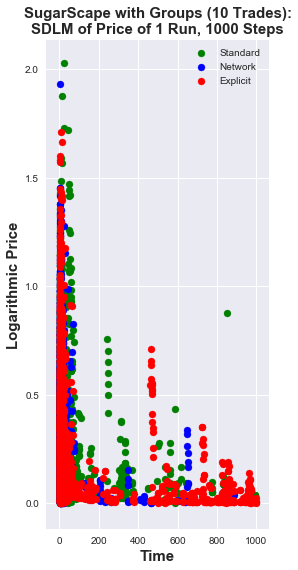

In [122]:
#from numpy.polynomial.polynomial import polyfit
fig3, ax3 = plt.subplots(figsize=(4,9))
#ax3.plot(x_dev_net, y_dev_net, label = "Network", color='blue')
#ax3.plot(x_dev_brute, y_dev_brute, label = "Explicit", color = 'red')
#ax3.plot(x_dev_stan, y_dev_stan, label = "Standard", color ='green')
ax3.scatter(x_all_stan, y_all_stan,label = "Standard", color = 'green')
ax3.scatter(x_all_net, y_all_net, label = "Network", color = 'blue')
ax3.scatter(x_all_brute, y_all_brute, label = "Explicit",color = 'red')

plt.title("SugarScape with Groups (10 Trades):\nSDLM of Price of 1 Run, 1000 Steps", fontsize = 15, fontweight = "bold")
plt.xlabel("Time", fontsize = 15, fontweight = "bold")
plt.ylabel("Logarithmic Price", fontsize = 15, fontweight = "bold")
plt.legend()


In [6]:
stan_multi_s = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Initial\\Standard\\stan_multi_sur.p", "rb"))
stan_multi_t = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Initial\\Standard\\stan_multi_time.p", "rb"))
brute_multi_s = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Policy\\Explicit\\brute_multi_sur_10.p", "rb"))
brute_multi_t = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Policy\\Explicit\\brute_multi_time_10.p", "rb"))
net_multi_s = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Policy\\Network\\net_multi_sur_10.p", "rb"))
net_multi_t =pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Policy\\Network\\net_multi_time_10.p", "rb"))
net_mean = mean(net_multi_s)
brute_mean = mean(brute_multi_s)
stan_mean = mean(stan_multi_s)
net_time = round(mean(net_multi_t),2)
brute_time = round(mean(brute_multi_t),2)
stan_time = round(mean(stan_multi_t),2)


In [7]:


t, p = stats.ttest_ind(stan_multi_s,brute_multi_s)
brute_p = p * 2
t2,  p2 = stats.ttest_ind(stan_multi_s,net_multi_s)
net_p = p2 * 2
#t3, p3 = stats.ttest_ind(net_multi_s[0:35], stan_multi_s[0:35])
#alt_p = round(p3 *2, 8)
print ("Net-Stan t_test: ", net_p)
print ("Explixit_Stan t_test: ",brute_p)

Net-Stan t_test:  1.6079982167
Explixit_Stan t_test:  0.62505566283


Text(0,0.5,'Frequency')

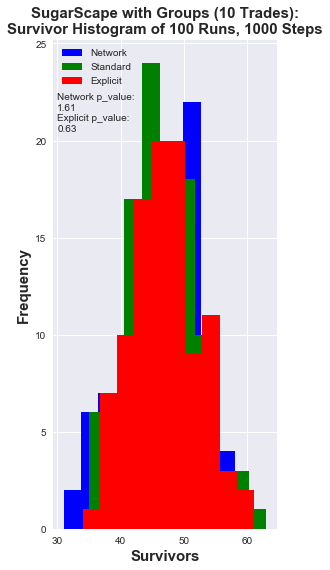

In [9]:
fig5, ax5 = plt.subplots(figsize=(4,9))
plt.hist(net_multi_s, label = "Network", color = 'blue')
plt.hist(stan_multi_s, label = "Standard", color = 'green')
plt.hist(brute_multi_s, label = "Explicit", color = 'red')
plt.text(30, 20.5, "Network p_value:\n"+str(round(net_p,2)) +"\nExplicit p_value:\n"+str(round(brute_p,2)))
plt.legend(loc = 2)
plt.title("SugarScape with Groups (10 Trades):\nSurvivor Histogram of 100 Runs, 1000 Steps", fontweight = "bold", fontsize = 15)
plt.xlabel("Survivors", fontweight = "bold", fontsize = 15)
plt.ylabel("Frequency", fontweight = "bold", fontsize = 15)

In [10]:
t, p = stats.ttest_ind(stan_multi_t,brute_multi_t)
brute_t_p = (p * 2,10)
t2,  p2 = stats.ttest_ind(stan_multi_t,net_multi_t)
net_t_p = (p2 * 2, 10)
brute_t_p, net_t_p

((8.1772301222416819e-38, 10), (0.00025955266148038552, 10))

(20, 75)

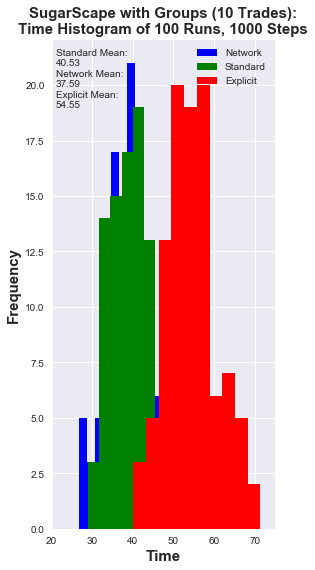

In [20]:
fig6, ax6 = plt.subplots(figsize=(4,9))
plt.hist(net_multi_t, label = "Network", color = 'blue')
plt.hist(stan_multi_t, label = "Standard", color = 'green')
plt.hist(brute_multi_t, label = "Explicit", color = 'red')
#plt.text(78, 23, "Network p-value: "+str(net_t_p) +"\nExplicit p-value: "+str(brute_t_p))
plt.legend(loc=1)
plt.title("SugarScape with Groups (10 Trades):\nTime Histogram of 100 Runs, 1000 Steps", fontweight = "bold", fontsize = 15)
plt.text(21, 19, "\nStandard Mean:\n"+str(stan_time) + "\nNetwork Mean:\n"+str(net_time) +"\nExplicit Mean:\n"+str(brute_time))
plt.xlabel("Time", fontweight = "bold", fontsize = 15)
plt.ylabel("Frequency", fontweight = "bold", fontsize = 15)
plt.xlim(20, 75)

## Meta Types

In [131]:
net_type_df = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Policy\\Network\\type_df_10.p", "rb"))
brute_type_df =pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Policy\\Explicit\\brute_type_df_10.p", "rb"))

In [132]:
def meta_plots(df):  
    consolidated = {}
    for run, steps in df.items():
        metas =[]
        sub_agents = []
        indies = [] 
        for step, counts in steps.items(): 
            metas.append(len(counts[0]))
            if len(counts[0]) > 0:
                sub = 0
                for subs in counts[0]:
                    sub += subs[1]
                sub_agents.append(sub)
            else:
                sub_agents.append(0)
                    
            indies.append(counts[1])
        consolidated[run] = [metas, sub_agents, indies]
    
    return consolidated

In [133]:
net_type_con = meta_plots(net_type_df)
brute_type_con = meta_plots(brute_type_df)

In [134]:
x = [i for i in range(1000)]


Text(0,0.5,'Number of Agents')

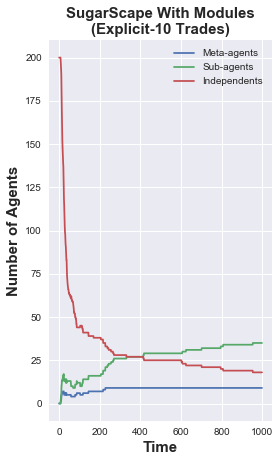

In [135]:
fig7, ax7 = plt.subplots(figsize=(4,7))
plt.plot(x, brute_type_con["Run0"][0], label = 'Meta-agents')
plt.plot(x, brute_type_con["Run0"][1], label = 'Sub-agents')
plt.plot(x, brute_type_con["Run0"][2], label = 'Independents')
plt.title("SugarScape With Modules\n(Explicit-10 Trades)", fontweight = "bold", fontsize = 15)
plt.legend()
plt.xlabel("Time", fontweight = "bold", fontsize = 15)
plt.ylabel("Number of Agents", fontweight = "bold", fontsize = 15)


In [136]:
for run, agent_type in brute_type_con.items():
    if agent_type[1][-1] > agent_type[2][-1]:
        print (run)

Run0
Run1
Run3
Run9
Run12
Run18
Run21
Run22
Run26
Run30
Run31
Run33
Run34
Run38
Run45
Run48
Run50
Run51
Run54
Run55
Run56
Run57
Run59
Run60
Run64
Run67
Run73
Run86
Run87
Run90
Run92
Run98


In [137]:
def final_agents(input):
    subs = []
    inds = []
    for run, agent_type in input.items():
        subs.append(agent_type[1][-1])
        inds.append(agent_type[2][-1])
    return subs, inds


In [138]:
y_subs_brute, y_inds_brute = final_agents(brute_type_con)
y_subs_net, y_inds_net = final_agents(net_type_con)
x = [i for i in range(100)]

Text(0,0.5,'Frequency of Type')

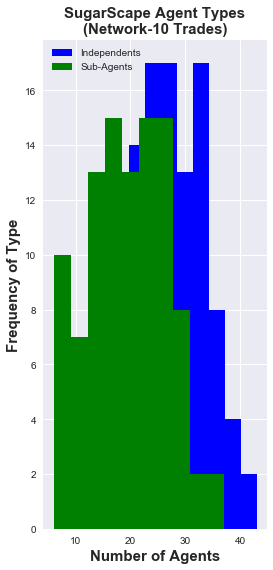

In [139]:
fig7, ax7 = plt.subplots(figsize=(4,9))
plt.hist(y_inds_net, label = 'Independents', color = "blue")
plt.hist(y_subs_net, label = 'Sub-Agents', color = "green")
plt.legend()
plt.title("SugarScape Agent Types\n(Network-10 Trades)", fontweight = "bold", fontsize = 15)
plt.legend()
plt.xlabel("Number of Agents", fontweight = "bold", fontsize = 15)
plt.ylabel("Frequency of Type", fontweight = "bold", fontsize = 15)